In [101]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [102]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [104]:
titanic_df['family'] =  titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.drop(['Parch', 'SibSp'], axis =1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [105]:
d={1:"C", 2: "S", 3:"Q", None:"S"}
titanic_df["Embarked"]=titanic_df.apply(lambda row: d[row["Pclass"]] if pd.isnull(row['Embarked']) else row['Embarked'],
    axis=1)
titanic_df =titanic_df.join(pd.get_dummies(titanic_df["Embarked"], prefix="Port ")).drop("Embarked", axis=1)

d={1:"C", 2: "S", 3:"Q", None:"S"}
test_df["Embarked"]=test_df.apply(lambda row: d[row["Pclass"]] if pd.isnull(row['Embarked']) else row['Embarked'],
    axis=1)
test_df =test_df.join(pd.get_dummies(test_df["Embarked"], prefix="Port ")).drop("Embarked", axis=1)



In [106]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,family,Port _C,Port _Q,Port _S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,0,1


In [107]:
median_age = np.nanmedian(titanic_df.Age)
test_df.Age = test_df.Age.fillna(median_age)

titanic_df.Age = titanic_df.Age.fillna(median_age)

In [108]:
titanic_df['family'] =  titanic_df['SibSp'] + titanic_df['Parch']
titanic_df = titanic_df.drop(['Parch', 'SibSp', 'Cabin','Ticket','PassengerId', 'Name'], axis =1)


In [109]:
test_df['family'] =  test_df['SibSp'] + test_df['Parch']
test_df = test_df.drop(['Parch', 'SibSp', 'Cabin','Ticket', 'Name'], axis =1)

In [110]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,family,Port _C,Port _Q,Port _S
0,0,3,male,22.0,7.2500,1,0,0,1
1,1,1,female,38.0,71.2833,1,1,0,0
2,1,3,female,26.0,7.9250,0,0,0,1
3,1,1,female,35.0,53.1000,1,0,0,1
4,0,3,male,35.0,8.0500,0,0,0,1


family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

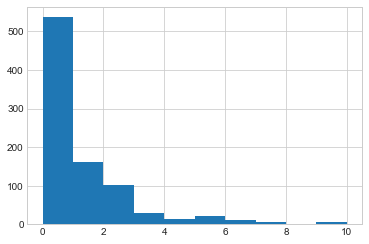

In [111]:
titanic_df.family.hist()
titanic_df.groupby('family')['Survived'].mean()

In [112]:
pclass_df = pd.get_dummies(titanic_df['Pclass'],prefix="class")
titanic_df = titanic_df.join(pclass_df)
titanic_df = titanic_df.drop('Pclass',axis=1)

pclass_test_df = pd.get_dummies(test_df['Pclass'],prefix="class")
test_df = test_df.join(pclass_df)
test_df = test_df.drop('Pclass',axis=1)

In [113]:
sex_series = titanic_df["Sex"].astype("category")
titanic_df = titanic_df.join(pd.get_dummies(sex_series)).drop("Sex", axis=1)


In [114]:
sex_series = test_df["Sex"].astype("category")
test_df = test_df.join(pd.get_dummies(sex_series)).drop("Sex", axis=1)


# Add Features

In [115]:
titanic_df.head()

,Survived,Age,Fare,family,Port _C,Port _Q,Port _S,class_1,class_2,class_3,female,male
0,0,22.0,7.2500,1,0,0,1,0,0,1,0,1
1,1,38.0,71.2833,1,1,0,0,1,0,0,1,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,1,0,0,1,1,0,0,1,0
4,0,35.0,8.0500,0,0,0,1,0,0,1,0,1


In [116]:
test_df.head()

,PassengerId,Age,Fare,Port _C,Port _Q,Port _S,family,class_1,class_2,class_3,female,male
0,892,34.5,7.8292,0,1,0,0,0,0,1,0,1
1,893,47.0,7.0000,0,0,1,1,1,0,0,1,0
2,894,62.0,9.6875,0,1,0,0,0,0,1,0,1
3,895,27.0,8.6625,0,0,1,0,1,0,0,0,1
4,896,22.0,12.2875,0,0,1,2,0,0,1,1,0


In [117]:
median_fare = np.nanmedian(test_df.Fare)
test_df.Fare = test_df.Fare.fillna(median_fare)

In [118]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Age        418 non-null float64
Fare       418 non-null float64
Port _C    418 non-null uint8
Port _Q    418 non-null uint8
Port _S    418 non-null uint8
family     418 non-null int64
class_1    418 non-null uint8
class_2    418 non-null uint8
class_3    418 non-null uint8
female     418 non-null uint8
male       418 non-null uint8
dtypes: float64(2), int64(1), uint8(8)
memory usage: 13.1 KB


# Model Fitting

In [119]:
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [120]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.8069584736251403

In [123]:

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.978675645342312

In [121]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Age,-0.035578
1,Fare,0.003044
2,family,-0.212578
3,Port _C,0.400364
4,Port _Q,0.281657
5,Port _S,-0.049490
6,class_1,1.147032
7,class_2,0.334681
8,class_3,-0.849181
9,female,1.647923


In [124]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)